From the Official Kaggle Dataset Page (https://www.kaggle.com/sudalairajkumar/indian-startup-funding)

Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days? This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

This dataset Contains Information about Indian Startups from 2015-2019 regarding information about startups such as their location,amount of funding they have received etc.This dataset can help us understand the startup landscape and help us in comparing with current startup landscape in india.

In [1]:
'''Importing Libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re

pd.set_option('display.max_rows',3000)

In [2]:
'''Load Data and rename columns to enable us to use dot notation and to parse Date as a datetime object which can 
give us much more insights with the dates.Header tells pandas to ignore the first line which is the header of the 
column

Having Some Issue with the Geomapping Code.Cleaned Up the Replace Method Now

Removing the Remarks Column Since there are around 85% values empty
'''

startup_data=pd.read_csv('startup_funding_modified.csv',header=0,encoding='utf8',names=['Sr_No','Startup_Date','Startup_Name','Industry_Vertical','SubVertical','City_Location','Investor_Name','Investment_Type','Amount_in_USD','Remarks'])

startup_data.drop(columns='Remarks',inplace=True)

In [3]:
'''Information about the memory consumption of the dataset.This step is important as it can tell us if we need to
read the dataset in chunks while reading the data in whichever format we have available'''

startup_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
Sr_No                3009 non-null int64
Startup_Date         3009 non-null object
Startup_Name         3009 non-null object
Industry_Vertical    2838 non-null object
SubVertical          2073 non-null object
City_Location        2829 non-null object
Investor_Name        2986 non-null object
Investment_Type      3006 non-null object
Amount_in_USD        2045 non-null object
dtypes: int64(1), object(8)
memory usage: 1.6 MB


In [4]:
'''Basic stats about the dataset'''
startup_data.describe(include=['object','int'])

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD
count,3009.000000,3009,3009,2838,2073,2829,2986,3006,2045
unique,NaN,1004,2434,811,1912,70,2380,50,487
top,NaN,08/07/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"1,000,000"
freq,NaN,11,8,941,11,842,39,1356,161
mean,1526.737454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,884.509003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,756.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2292.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Our Inference About the Above Basic Stats:</b>

<b>Ola Cabs is the Most Common Startup Name</b>.This could be because Ola is involved in a lot of verticals(Food,Item  Delivery,Grocery etc).Or it could also be because there is some labelling issue with the dataset.

<b>Out of 3000 records.almost a quarter(25%) of those startups belong to Bangalore.</b>This should be of no surprise as 
Bangalore is rightfully called the "Silicon Valley Of India."

<b>Most Investors try to acquire a part of the company in which they invest.</b>This is because they would like to see a positive return on their investment and also to help it grow.

You can refer to this link for More Information:https://www.investopedia.com/articles/financial-careers/09/private-equity.asp

In [5]:
'''Fixed Erroneous records from the dataset file so that no issues in python file.'''

startup_data["Startup_Date"]= pd.to_datetime(startup_data["Startup_Date"])

In [6]:
startup_data.head(10)

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD
0,0,2019-05-09,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000"
1,1,2019-04-09,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000"
2,2,2019-04-09,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000"
3,3,2019-04-09,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000"
4,4,2019-04-09,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000"
5,5,2019-04-09,Myelin Foundry,Information Technology,Deep-technology,Bangalore,Endiya Partners,Seed,"10,00,000"
6,6,2019-04-09,Atomberg Technology,Consumer Technology,"Consumer Electronics, Home Appliances",Mumbai,A91 Partners,Series A,"10,000,000"
7,7,2019-04-09,GOQii,Health and Wellness,Wearable Fitness Bands,California,Bennett Coleman and Company Ltd (BCCL),Series C,"450,000,000"
8,8,2019-03-09,Vyapar App,Accounting,Mobile-based Accounting Software,Bangalore,"India Quotient, Axilor Ventures",Series A,"5,000,000"
9,10,2019-01-08,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"20,000,000"


In [7]:
city_data=startup_data.City_Location

replacement_dictionary={"USA":np.NaN,"US":np.NaN,"US/India":np.NaN,"Dallas":np.NaN,"Boston":np.NaN,"New York":np.NaN,"London":np.NaN,"Nairobi":np.NaN,"SFO / Karnataka":np.NaN,"Seattle":np.NaN,"San Francisco":np.NaN,"Santa Monica":np.NaN,"Missourie":np.NaN,"India":np.NaN,"Palo Alto":np.NaN,"California":np.NaN,"SFO / Bangalore":np.NaN,"Burnsville":np.NaN,"Singapore":np.NaN,"Bangalore":"Karnataka","Belgaum":"Karnataka","Udupi":"Karnataka","New Delhi":"NCT of Delhi","Gurgaon":"NCT of Delhi","Noida":"NCT of Delhi","Delhi":"NCT of Delhi","Gurugram":"NCT of Delhi","Mumbai":"Maharashtra","Pune":"Maharashtra","Nagpur":"Maharashtra","Hyderabad":"Telangana","Faridabad":"Haryana","Surat":"Gujarat","Ahmedabad":"Gujarat","Ahemdabad":"Gujarat","Ahemadabad":"Gujarat","Vadodara":"Gujarat","Jaipur":"Rajasthan","Jodhpur":"Rajasthan","Udaipur":"Rajasthan","Kolkata":"West Bengal","Kolkatta":"West Bengal","Indore":"Madhya Pradesh","Bhopal":"Madhya Pradesh","Gwalior":"Madhya Pradesh","Coimbatore":"Tamil Nadu","Karur":"Tamil Nadu","Hubli":"Tamil Nadu","Panji":"Goa","Panaji":"Goa","Kozhikode":"Kerala","Trivandrum":"Kerala","Agra":"Uttar Pradesh","Kanpur":"Uttar Pradesh","Lucknow":"Uttar Pradesh","Varanasi":"Uttar Pradesh","Gaya":"Bihar","Bhubneswar":"Odisha","Bhubaneswar":"Odisha","New New Delhi":"NCT of Delhi","Nw Delhi":"NCT of Delhi","Kochi":"Kerala","Srinagar":"Jammu & Kashmir","Rourkela":"Bihar","Siliguri":"West Bengal"}

city_data=startup_data.City_Location.replace(replacement_dictionary)

startup_data['New_City_Location']=city_data

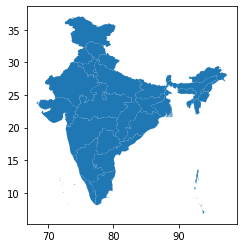

In [8]:
geo_data=gpd.read_file('Admin2.shp')
max_count,min_count=1,886
# startup_data.isna().sum()
geo_data.plot()

In [9]:
# startup_data.New_City_Location.value_counts(dropna=False)
startup_data.dropna(subset=['New_City_Location'],inplace=True)
startup_data.isna().sum()
# new_startup_data=startup_data.loc[:,['New_City_Location']]

Sr_No                  0
Startup_Date           0
Startup_Name           0
Industry_Vertical      0
SubVertical          754
City_Location          0
Investor_Name         22
Investment_Type        2
Amount_in_USD        913
New_City_Location      0
dtype: int64

In [73]:
new_dataframe=pd.merge(left=geo_data,right=startup_data,left_on='ST_NM',right_on='New_City_Location')

# new_dataframe[new_dataframe.ST_NM.isna()]

Earlier we were getting some NaN values(Due to Wrong Joining Operation.Default is The Inner Join(Which is Correct))

In [12]:
len(new_dataframe)

2698

In [13]:
new_dataframe.ST_NM.value_counts()

NCT of Delhi       886
Karnataka          846
Maharashtra        685
Telangana          100
Gujarat             53
Rajasthan           33
West Bengal         24
Madhya Pradesh      18
Goa                 12
Chandigarh          11
Uttar Pradesh        9
Tamil Nadu           7
Kerala               6
Haryana              3
Odisha               2
Bihar                2
Jammu & Kashmir      1
Name: ST_NM, dtype: int64

In [14]:
sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=min_count, vmax=max_count))

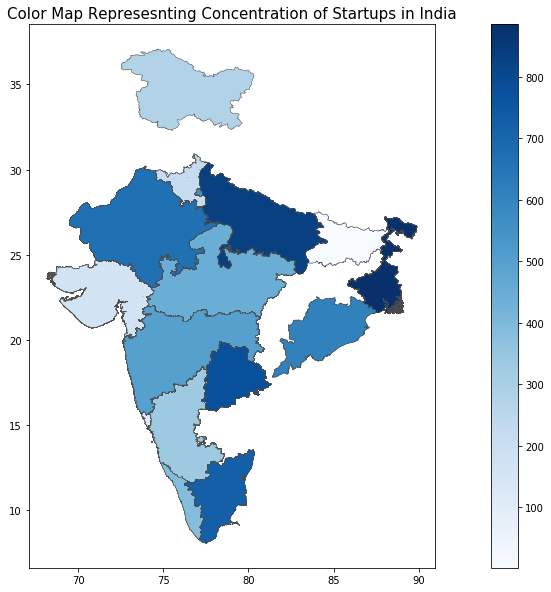

In [15]:
fig, ax = plt.subplots(1, figsize=(20, 10))
cbar = fig.colorbar(sm)
# new_dataframe=new_dataframe.loc[:,['ST_NM',"geometry","New_City_Location"]]
plt.title("Color Map Represesnting Concentration of Startups in India",fontsize=15)
new_dataframe.plot(column='ST_NM',cmap='Blues',edgecolor='0.3',linewidth=0.5,ax=ax)

In [16]:
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace(r'[,]','',regex=True)
# startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace('\.\d*','',regex=True)
startup_data.Amount_in_USD=startup_data.Amount_in_USD.replace(r'\+*','',regex=True)

startup_data.drop(startup_data.loc[(startup_data.Amount_in_USD=='Undisclosed') | (startup_data.Amount_in_USD=='undisclosed')].index,inplace=True)

startup_data.Amount_in_USD.fillna(0,inplace=True)

startup_data.Amount_in_USD=pd.to_numeric(startup_data.Amount_in_USD)

In [17]:
startup_data.Amount_in_USD.value_counts(dropna=False)

0.000000e+00    913
1.000000e+06    156
5.000000e+05    102
2.000000e+06     65
5.000000e+06     61
3.000000e+06     57
1.000000e+07     56
1.000000e+05     54
1.500000e+05     44
2.000000e+05     39
2.500000e+05     39
6.000000e+06     37
1.500000e+07     35
4.000000e+06     35
1.500000e+06     33
3.000000e+05     31
6.000000e+05     23
2.500000e+06     21
4.000000e+05     21
5.000000e+07     19
2.000000e+07     18
1.200000e+06     18
4.500000e+05     17
2.500000e+07     16
7.000000e+06     16
1.000000e+08     16
3.000000e+07     15
7.500000e+05     13
1.200000e+07     13
1.100000e+06     12
3.500000e+05     12
8.000000e+06     12
3.500000e+06     11
4.500000e+06     10
1.100000e+07     10
5.000000e+04     10
7.000000e+05      9
6.500000e+05      9
3.100000e+06      9
3.500000e+07      9
1.300000e+06      9
1.600000e+07      8
7.500000e+06      8
9.000000e+05      7
4.000000e+04      7
1.800000e+05      7
1.400000e+06      7
1.600000e+06      6
1.200000e+05      6
5.500000e+06      6


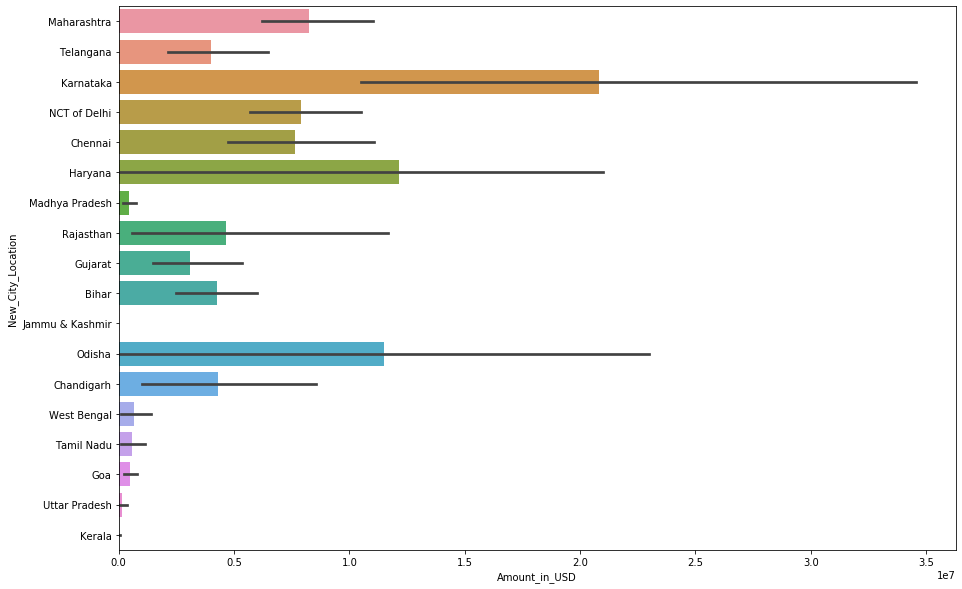

In [18]:
'''Inference
Karnataka has the Highest Number of Startups with the Most Value
Kerala has the least Startups in terms of value

Surprisingly,Value of Startups in Haryana is more than that of Maharashtra(Check Startups based on New City Localtion)
'''
plt.figure(figsize=(15,10))
sns.barplot(x='Amount_in_USD',y='New_City_Location',data=startup_data)

In [19]:
'''Percentage of Missing records'''

startup_data.isnull().sum()/len(startup_data)

Sr_No                0.000000
Startup_Date         0.000000
Startup_Name         0.000000
Industry_Vertical    0.000000
SubVertical          0.270154
City_Location        0.000000
Investor_Name        0.007882
Investment_Type      0.000717
Amount_in_USD        0.000000
New_City_Location    0.000000
dtype: float64

In [20]:
?sns.scatterplot

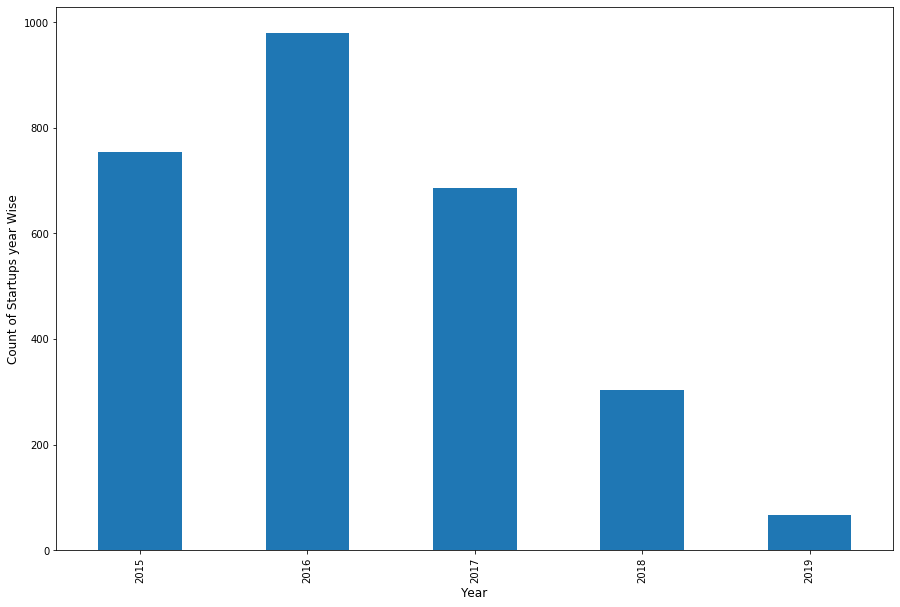

In [21]:
'''Inference
The startup scene in india basically peaked at around 2016 and has been on a decline ever since.Maybe some governmental factors have come into picture or there are too many people trying to jump in this field.This has resulted in lesser amount of funding for everybody
'''
plt.figure(figsize=(15,10))
plt.xlabel("Year",fontsize=12)
plt.ylabel("Count of Startups year Wise",fontsize=12)
startup_data.Startup_Date.dt.year.value_counts().sort_index().plot(kind='bar')

In [22]:
'''Startups which have received funding in the year 2019'''
startup_fund_2019=startup_data.loc[startup_data.Startup_Date.dt.year==2019]

In [23]:
max(startup_fund_2019.Amount_in_USD)

3900000000.0

In [24]:
min(startup_fund_2019.Amount_in_USD)

145000.0

In [25]:
startup_fund_2019.Amount_in_USD.mean()

81850481.12746269

In [26]:
startup_fund_2016=startup_data.loc[startup_data.Startup_Date.dt.year==2016]
print(max(startup_fund_2016.Amount_in_USD))

print(min(startup_fund_2016.Amount_in_USD))

print(startup_fund_2016.Amount_in_USD.mean())

200000000.0
0.0
3899832.763265306


Inference for the above calculations.
Although the Number of startups which have got funding in the year 2019,there is still more money with these startups than our older startups.Maybe we can also check whether the startups which have received this new funding are well established startups or new Startups

In [27]:
list_startups_2019=startup_fund_2019.Startup_Name.unique().tolist()

In [28]:
'''Very Few Startups have received funding twice in the same financial year(Which is pretty rare) while almost all the others have received only funding once in the entire year.'''

startup_fund_2019.Startup_Name.value_counts()

Bira91                                                    2
CarDekho                                                  2
NanoClean Global                                          1
Daalchini Technologies                                    1
Zenoti                                                    1
RenewBuy                                                  1
Board Infinity                                            1
Recykal                                                   1
Leegality                                                 1
Vogo Automotive Pvt. Ltd.                                 1
Samunnati Financial Intermediation & Services Pvt. Ltd    1
Meesho                                                    1
My Healthcare                                             1
Pratilipi                                                 1
Medlife                                                   1
BharatPe                                                  1
Setu                                    

In [29]:
list_startups_2016=startup_fund_2016.Startup_Name.unique().tolist()

In [30]:
'''Here the difference in clear.The reason for more amount of funding received was due to more startups being launched and several of these startups received funding multiple times withing the same calender year(More than the number of startups in the year 2019)'''

startup_fund_2016.Startup_Name.value_counts()

NoBroker                     4
Byjus                        3
TinyStep                     3
Swiggy                       3
Koovs                        3
Nykaa                        2
Meesho                       2
Murgency                     2
Simplilearn                  2
Lenskart                     2
Petoo                        2
Arcatron Mobility            2
Smartcooky                   2
Stalk Buy Love               2
Bonhomia                     2
Mobikwik                     2
Servify                      2
Furlenco                     2
Affordplan                   2
Travelyaari                  2
LetsMD                       2
FreshMenu                    2
1mg                          2
WorkIndia                    2
Diro Labs                    2
Flyrobe                      2
Tracxn                       2
Kartrocket                   2
Voonik                       2
TripShelf                    2
Yufta                        2
Wooplr                       2
ShareCha

In [31]:
set(list_startups_2016).intersection(list_startups_2019)

{'Ather Energy',
 'Byjus',
 'FabHotels',
 'Indus OS',
 'KrazyBee',
 'Meesho',
 'NoBroker',
 'RenewBuy',
 'Unacademy',
 'Uniphore',
 'Zenoti'}

Inference:There are only a few common startups which are common in these both years.So inspite of the trend that There are lesser funding compared to previous years,these startups have prevailed.Maybe this trend can be observed for the industries these startups belong to.

In [32]:
'''Important Investors throughout the Years (Overall) and also investors for the year 2016 and 2019 for the comparisison'''

list_investors=startup_data.copy()

In [33]:
list_investors.Investor_Name.fillna(" ",inplace=True)

In [34]:
list_investors.Investor_Name.isna().sum()

0

Looking at the type of data that we have,we need to clean the file because the file has a few names in floating type which is obviously a mistake.Turns out,the NaN's  in the filename are represented as a number.Did the same using fillna method

In [35]:
list_investors['Investor_Name']=list_investors.Investor_Name.replace(r'\band\b|\b& others\b|\bothers\b|\b& Others\b|\bUndisclosed investors\b','',regex=True)

replacement_dictionary={"Unknown High Net-Worth Individuals":"Undisclosed Investors","Undisclosed":"Undisclosed Investors","":"Undisclosed Investors"}

list_investors['Investor_Name']=list_investors.Investor_Name.replace(replacement_dictionary)

new_investors=list_investors.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate=[]

In [36]:
new_investors_separate=[data.strip() for item in new_investors for data in item if data not in new_investors_separate or data != ' ']

In [37]:
new_investor_series=pd.Series(data=new_investors_separate,name='Name')
new_investor_series=new_investor_series.loc[new_investor_series!='']

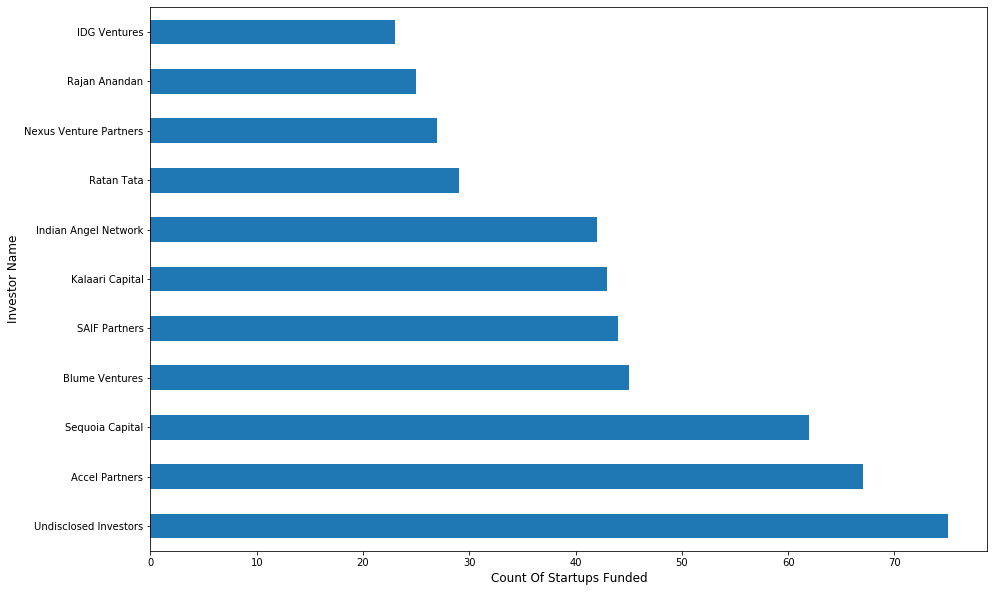

In [38]:
'''List of Top 10 Investment Personalities/Firms. in the Indian Startup Scene.
Firms are much more active in the Participation scene as they have more money to spend obviously.
'''
plt.figure(figsize=(15,10))
plt.ylabel("Investor Name",fontsize=12)
plt.xlabel("Count Of Startups Funded",fontsize=12)
new_investor_series.value_counts().head(11).plot(kind='barh')

In [39]:
# ?list_investors.Investor_Name.fillna

In [40]:
# ?pd.Series.drop

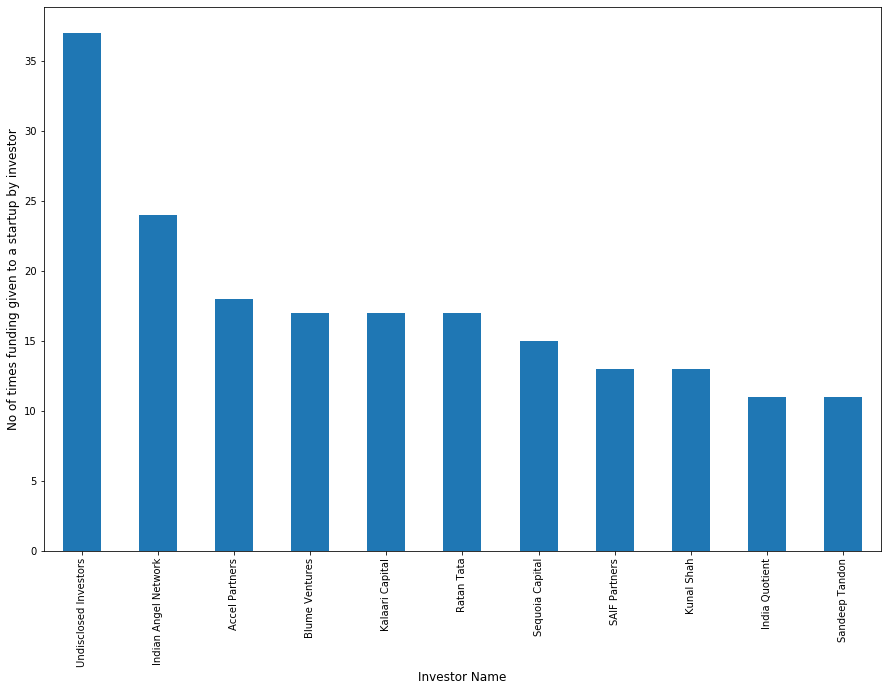

In [41]:
'''Top 10 Investors in the Year 2016'''

list_investors_2016=list_investors.loc[list_investors.Startup_Date.dt.year==2016]
new_investors_2016=list_investors_2016.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate_2016=[]
new_investors_separate_2016=[data.strip() for item in new_investors_2016 for data in item if data not in new_investors_separate_2016 or data != ' ']

new_investor_series_2016=pd.Series(data=new_investors_separate_2016,name='Name')
new_investor_series_2016=new_investor_series_2016.loc[new_investor_series_2016!='']

plt.figure(figsize=(15,10))
plt.xlabel("Investor Name",fontsize=12)
plt.ylabel("No of times funding given to a startup by investor",fontsize=12)
new_investor_series_2016.value_counts().head(11).plot(kind='bar')

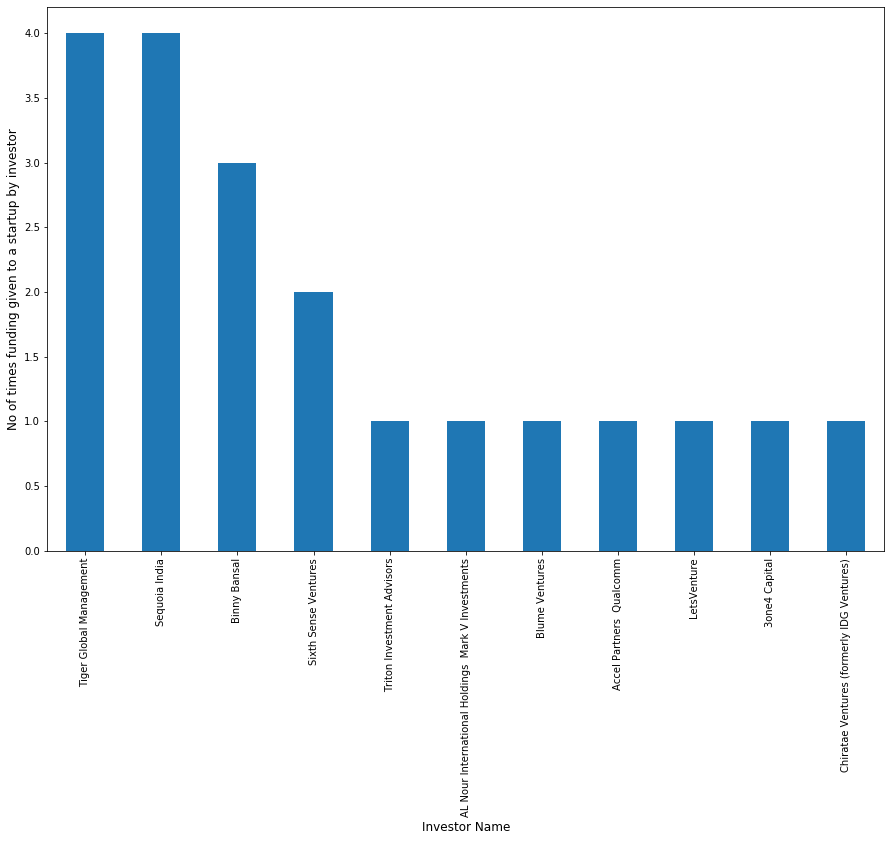

In [42]:
'''Top 10 Investors in the year 2019'''

list_investors_2019=list_investors.loc[list_investors.Startup_Date.dt.year==2019]
new_investors_2019=list_investors_2019.Investor_Name.apply(lambda x:x.split(','))
new_investors_separate_2019=[]
new_investors_separate_2019=[data.strip() for item in new_investors_2019 for data in item if data not in new_investors_separate_2019 or data != ' ']

new_investor_series_2019=pd.Series(data=new_investors_separate_2019,name='Name')
new_investor_series_2019=new_investor_series_2019.loc[new_investor_series_2019!='']

plt.figure(figsize=(15,10))
plt.xlabel("Investor Name",fontsize=12)
plt.ylabel("No of times funding given to a startup by investor",fontsize=12)
new_investor_series_2019.value_counts().head(11).plot(kind='bar')

<b>Inference</b>:From both the years,as the bar graph shows,the number of investments were more due to big players such as Indian Angel Network,Accel Partners etc Investing more in the Startups in india at that point of time.

However in the year 2019,none of the same big players invested money into the startups in the year 2019 with as much intensity as during the 2016 year.

In [43]:
"""What's in a Name.
In this,i will check for some common ending words assoicated with daily language and alos see startups which have mispronounced words(Say Combat to Kombat etc to see if the name has anything to do with the kind of funding that it receives.

We have 2429 unique names and the rest i believe are Some Startups that would have received funding multiple times
"""

name_data=startup_data.copy()

In [44]:
len(name_data.Startup_Name.unique())

2277

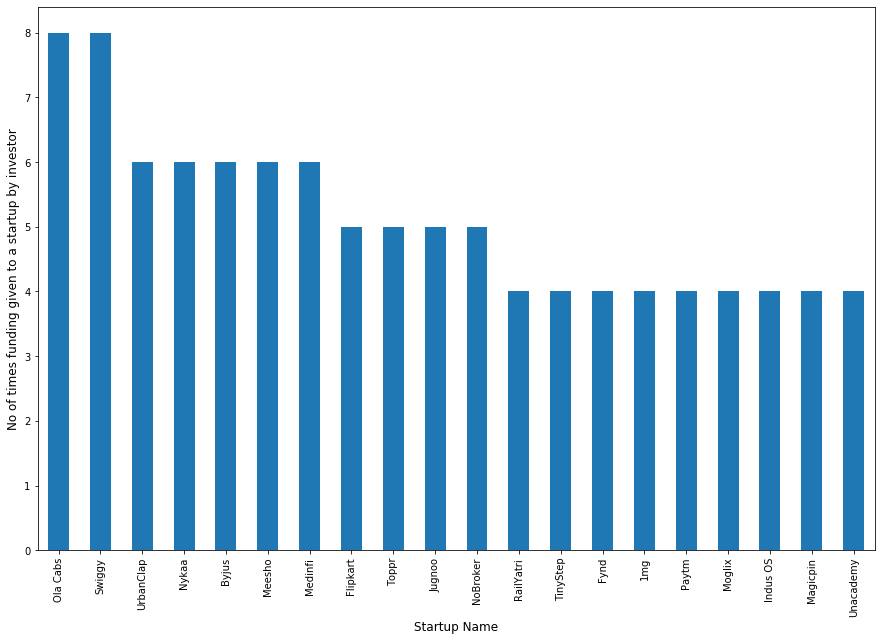

In [45]:
"""In case you were wondering how we have Ola Cabs and Ola separately,it's because they are 2 separate organisations altogether.Kind of like Alphabet and Google"""

plt.figure(figsize=(15,10))
plt.xlabel("Startup Name",fontsize=12)
plt.ylabel("No of times funding given to a startup by investor",fontsize=12)
name_data.Startup_Name.value_counts().head(20).plot(kind='bar')

In [46]:
'''Finding Startups with The words Ai,.com,kart,eat etc in the title'''

name_data['Ai_in_Name']=name_data.Startup_Name.str.find('.ai')
ai_data=name_data.loc[name_data.Ai_in_Name!=-1]
ai_data.Amount_in_USD.sum()

3950000.0

In [47]:
name_data['com_in_Name']=name_data.Startup_Name.str.find('.com')
com_data=name_data.loc[name_data.com_in_Name!=-1]

com_data.Amount_in_USD.sum()

936935000.0

In [48]:
name_data['kart_in_Name']=name_data.Startup_Name.str.find('kart')
kart_data=name_data.loc[name_data.kart_in_Name!=-1]
kart_data.Amount_in_USD.sum()

4927800000.0

In [49]:
'''No Startup has the word food in them which i thought should be a common word for many food/health/wellness based startups'''

name_data['food_in_Name']=name_data.Startup_Name.str.find('food')
name_data.loc[name_data.food_in_Name!=-1]

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,New_City_Location,Ai_in_Name,com_in_Name,kart_in_Name,food_in_Name


<b>Inference:</b>
<br/>
<br/>
Funding for Statups with the <b>.ai</b> suffix in their name:<b>36950000.0</b>
<br/>
Funding for Statups with the <b>.com</b> suffix in their name:<b>1081585000.0</b>
<br/>
Funding for Statups with the <b>kart</b> in their name:<b>4929800000.0</b>

All the Amounts are in USD

Although not always possible,having the word <b>kart</b> leads some kind of crediblity/idea about your business to potential investors which maybe allows them to invest more  money into your business.

Pure AI based companies i guess still have a long time to go in terms of the funding they received because comapared to traditional E commerce websites and apps,they are quite behind.

In [50]:
name_data.Startup_Name.value_counts()

Ola Cabs                                                  8
Swiggy                                                    8
UrbanClap                                                 6
Nykaa                                                     6
Byjus                                                     6
Meesho                                                    6
Medinfi                                                   6
Flipkart                                                  5
Toppr                                                     5
Jugnoo                                                    5
NoBroker                                                  5
RailYatri                                                 4
TinyStep                                                  4
Fynd                                                      4
1mg                                                       4
Paytm                                                     4
Moglix                                  

In [51]:
'''Collection of Startup names with Meaningful Names/Spelling Mistake Names.
Nykaa:Derived from the Word nayaka meaning heroine
NoBroker:Platform for owners to directly list their houses/apartments for rent.
Toppr:Play on the Word Topper
1mg:Medicine Quantity
Unacademy:Kind of Un Learning Place/Re learn new things
Zoctr:play on the word doctor
Fynd:play on the word find
Droom:play on the word vroom
Wassup:play on the word ssup/whassup
Delhivery:Delivery
Shuttl:Shuttle Bus
DriveU:driver/Self Drive
Licious:Delicious
Quikr:Do Something Quick/Quick Kar
Innov8:innovate
Teabox:Chai ka Dabba
Unbxd:Unboxed
Jhakaas:Excellent/Great
Zarget:Target
iOrderFresh:I Order Fresh Food/Items etc
happay:happy and payment
Smytten:Smitten
Chumbak:magnet
MeraDoctor:Personal Doctor
Innoviti:Innovate
Kissht:Installment
3HCare:healthCare?
Chillr:Change
MoneyOnMobile:Paisa Mobile Pe
Aasaanjobs:Easy Jobs
YourStory:Aapki Kahani
Rupaiya Exchange
Naaptol.com
Liqvid
Gaana.com
PaisaWapas
Pluss
Vyapar App
Register My Marriage
CaRPM 
KleverKid
CupoNation
CashFree
Eatfresh

The above names should be enough for me to try our hypothesis(Need to check this one later)
'''

'Collection of Startup names with Meaningful Names/Spelling Mistake Names.\nNykaa:Derived from the Word nayaka meaning heroine\nNoBroker:Platform for owners to directly list their houses/apartments for rent.\nToppr:Play on the Word Topper\n1mg:Medicine Quantity\nUnacademy:Kind of Un Learning Place/Re learn new things\nZoctr:play on the word doctor\nFynd:play on the word find\nDroom:play on the word vroom\nWassup:play on the word ssup/whassup\nDelhivery:Delivery\nShuttl:Shuttle Bus\nDriveU:driver/Self Drive\nLicious:Delicious\nQuikr:Do Something Quick/Quick Kar\nInnov8:innovate\nTeabox:Chai ka Dabba\nUnbxd:Unboxed\nJhakaas:Excellent/Great\nZarget:Target\niOrderFresh:I Order Fresh Food/Items etc\nhappay:happy and payment\nSmytten:Smitten\nChumbak:magnet\nMeraDoctor:Personal Doctor\nInnoviti:Innovate\nKissht:Installment\n3HCare:healthCare?\nChillr:Change\nMoneyOnMobile:Paisa Mobile Pe\nAasaanjobs:Easy Jobs\nYourStory:Aapki Kahani\nRupaiya Exchange\nNaaptol.com\nLiqvid\nGaana.com\nPaisaWap

In [52]:
startup_data.Industry_Vertical.value_counts()

Consumer Internet                                             929
Technology                                                    473
eCommerce                                                     186
Healthcare                                                     69
ECommerce                                                      61
Finance                                                        60
Logistics                                                      31
E-Commerce                                                     24
Food & Beverage                                                23
Education                                                      22
Ed-Tech                                                        14
E-commerce                                                     10
IT                                                              8
Ecommerce                                                       7
Real Estate                                                     6
Fin-Tech  

In [53]:
# startup_data.Industry_Vertical.unique()

In [54]:
'''Get Yearly Top 10 Industry Verticals to check for Trends in the Statup Scene.'''

#Cleaning the Data(Fixing Common Spelling Mistakes.Like for example FinTech and Fin-Tech,eCommerce and E-Commerce etc)

replacement_dictionary_industry={"eCommerce":"E-Commerce","ECommerce":"E-Commerce","Ecommerce":"E-Commerce","ecommerce":"E-Commerce","E-commerce":"E-Commerce","Fin-Tech":"FinTech","Financial Tech":"FinTech","Online Education Platform":"EdTech","Edtech":"EdTech","Information Technology":"IT","Tech":"Technology","Health & Fitness App":"Mobile Fitness App"}

industry_vertical_copy=startup_data.Industry_Vertical.copy()
industry_vertical_copy.value_counts()

Consumer Internet                                             929
Technology                                                    473
eCommerce                                                     186
Healthcare                                                     69
ECommerce                                                      61
Finance                                                        60
Logistics                                                      31
E-Commerce                                                     24
Food & Beverage                                                23
Education                                                      22
Ed-Tech                                                        14
E-commerce                                                     10
IT                                                              8
Ecommerce                                                       7
Real Estate                                                     6
Fin-Tech  

In [55]:
'''In may cases,the same business can be categorized into several types.Hence we do not change the verticals too much.Although we can it would end up removing the uniqueness of the Industry if say we categorize Ed-Tech,Fin-Tech etc as a single industry wherein they all are separate industries altogether.'''

startup_data.loc[(startup_data.Industry_Vertical=="Online Food Delivery")|(startup_data.Industry_Vertical=="Food Delivery Platform")|(startup_data.Industry_Vertical=="Food & Beverages")|(startup_data.Industry_Vertical=="Food and Beverages")|(startup_data.Industry_Vertical=="Finance")]

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,New_City_Location
10,11,2019-01-08,Progcap,Finance,Supply Chain Management,New Delhi,Sequoia India,Series A,5000000.0,NCT of Delhi
12,13,2019-01-08,Alteria Capital,Finance,VC Funds,Mumbai,"Azim Premji, Binny Bansal",Single Venture,140000000.0,Maharashtra
26,27,2019-02-07,RenewBuy,Finance,Auto Insurance,Gurgaon,"Lok Capital, IIFL Wealth",Series B,19000000.0,NCT of Delhi
42,43,2019-03-06,Avail Finance,Finance,FinTech,Bangalore,Matrix Partners,Series A,9000000.0,Karnataka
43,44,2019-04-06,BharatPe,Finance,FinTech,New Delhi,Insight Partners,Series B,75000000.0,NCT of Delhi
63,64,2019-04-16,Kuvera,Finance,Wealth Management,Bangalore,Eight Roads,Series A,45000000.0,Karnataka
83,84,2019-04-01,Samunnati Financial Intermediation & Services ...,Finance,Non-banking financial company,Chennai,"MASSIF, a Dutch government fund",Debt-Funding,5000000.0,Chennai
130,132,2018-01-08,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,0.0,Maharashtra
145,147,2018-08-20,Finzy,Finance,Online Loan Matchmaking Platform,Bangalore,NaN,Seed / Angel Funding,1000000.0,Karnataka
153,155,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,600000000.0,Maharashtra


In [56]:
startup_data.Industry_Vertical=startup_data.Industry_Vertical.replace(replacement_dictionary_industry)
startup_data.Industry_Vertical.value_counts()

Consumer Internet                                             929
Technology                                                    474
E-Commerce                                                    291
Healthcare                                                     69
Finance                                                        60
Logistics                                                      31
Food & Beverage                                                23
Education                                                      22
Ed-Tech                                                        14
FinTech                                                        12
IT                                                             10
EdTech                                                         10
Real Estate                                                     6
Others                                                          6
Logistics Tech                                                  5
Food and B

In [57]:
'''Get Groupby Data Per Year and Plot the Graph per year'''

data_by_year=startup_data.groupby([startup_data.Startup_Date.dt.year,startup_data.Industry_Vertical]).size()

In [58]:
# ?startup_data.groupby

In [59]:
new_data=data_by_year.nlargest(20).sort_index()

'Inference:The tech sector is the only sector constant across all the categories and there is some growth betweent he year 2016-2017 in this sector and E-Commerce startups while the 2nd highest in the year 2016,continue to have a steady decline\n\nThe reason for such wide fluctuations could be due to the following reasons.\nThe Industry verticals that we have are very divided.We could combine then but then we would loose the uniqueness across industries.\n\nMislabelling:Startups labelled as Customer Internet coud be apps,websites etc.There is no clear information present here.\n\nMostly still people are opening startups in the E commerce sector and the Tech Sector(The tech section is given to us in the category which is different from FinTech,Edu-Tech etc)\n\nthe Year 2015 is not inclued as it has all categories which are 100% Unique Like say a Online fashion based store,API developer etc.\n'

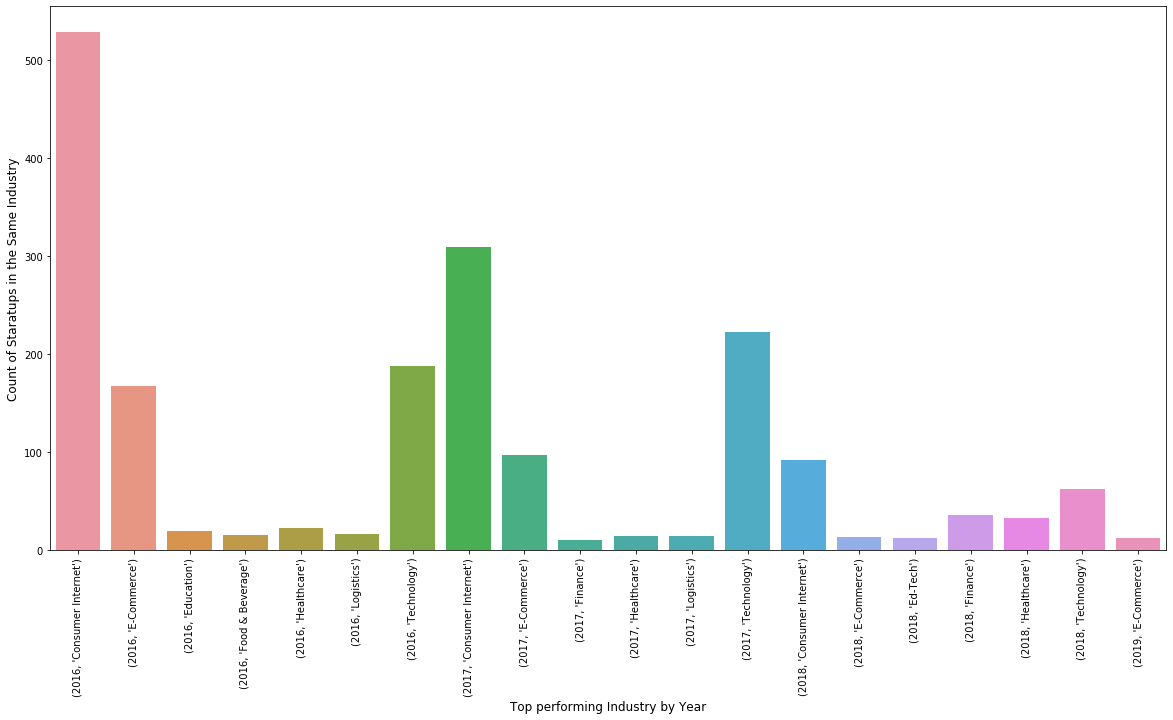

In [60]:
plt.figure(figsize=(20,10))
plt.xlabel("Top performing Industry by Year",fontsize=12)
plt.ylabel("Count of Staratups in the Same Industry",fontsize=12)
sns.barplot(new_data.index,new_data.values)
plt.xticks(rotation=90)

'''Inference:The tech sector is the only sector constant across all the categories and there is some growth betweent he year 2016-2017 in this sector and E-Commerce startups while the 2nd highest in the year 2016,continue to have a steady decline

The reason for such wide fluctuations could be due to the following reasons.
The Industry verticals that we have are very divided.We could combine then but then we would loose the uniqueness across industries.

Mislabelling:Startups labelled as Customer Internet coud be apps,websites etc.There is no clear information present here.

Mostly still people are opening startups in the E commerce sector and the Tech Sector(The tech section is given to us in the category which is different from FinTech,Edu-Tech etc)

the Year 2015 is not inclued as it has all categories which are 100% Unique Like say a Online fashion based store,API developer etc.
'''

In [61]:
startup_data.isna().sum()/len(startup_data)*100

Sr_No                 0.000000
Startup_Date          0.000000
Startup_Name          0.000000
Industry_Vertical     0.000000
SubVertical          27.015407
City_Location         0.000000
Investor_Name         0.788248
Investment_Type       0.071659
Amount_in_USD         0.000000
New_City_Location     0.000000
dtype: float64

In [62]:
'''How does the Startup Eco System Change with Respect to the various Year/Month Cycle.'''

data_by_year_month=startup_data.groupby([startup_data.Startup_Date.dt.year,startup_data.Startup_Date.dt.month]).size()
# data_by_year_month

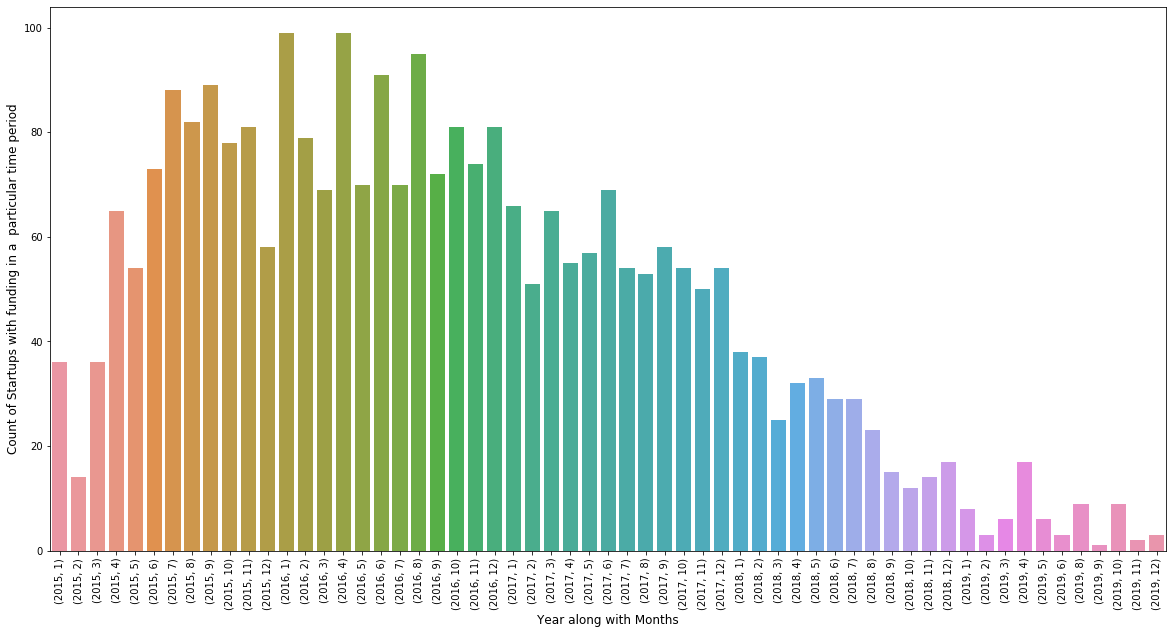

In [63]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Year along with Months",fontsize=12)
plt.ylabel('Count of Startups with funding in a  particular time period',fontsize=12)
sns.barplot(data_by_year_month.index,data_by_year_month.values)

<b>Inference:</b>

As Confirmed By our Earlier Graphs,the Startup Scene Really Exploded in the Year 2016(With the Month of April to be precise.).
    
And also the number of Startups is decreasing as we have seen that the bigger players are not investing money as they used to do earlier.

The least number of startups that got funding was in the year of 2019(September)

<b>How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)</b>

In [64]:
startup_data.Amount_in_USD.describe()

count    2.791000e+03
mean     1.140414e+07
std      1.013040e+08
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+05
75%      3.800000e+06
max      3.900000e+09
Name: Amount_in_USD, dtype: float64

<b>Inference</b>

<b>Minimum Funding</b> is <b>Zero(0)</b> Since We have cleaned this column and replaced all NaN's with zero value so that we have no empty values

<b>Max Funding</b> is about <b>39 Crores</b> and <b>average funding</b> is about <b>11 Lakhs</b>

The Startup with Max Funding is Rapido(Which is a Bike Cab/Taxi Service) and has received the funding only once.

In [65]:
startup_data[startup_data.Amount_in_USD==3.900000e+09]

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,New_City_Location
25,26,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,Karnataka


In [66]:
startup_data[startup_data.Startup_Name=="Rapido Bike Taxi"]

,Sr_No,Startup_Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investor_Name,Investment_Type,Amount_in_USD,New_City_Location
25,26,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,Karnataka


<b>Different types of Investment Received by Indian Startups<b>

In [67]:
startup_data.Investment_Type.unique()

array(['Maiden Round', 'Series A', 'Private Equity Round', 'pre-series A',
       'Seed', 'Series C', 'Seed Funding Round', 'Single Venture',
       'Corporate Round', 'Series D', 'Seed Round', 'Venture Round',
       'Series F', 'Series B', 'Angel', 'Series J', 'Angel Round',
       'Debt Funding', nan, 'pre-Series A', 'Seed Funding',
       'Venture - Series Unknown', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Equity', 'Debt-Funding',
       'Pre-Series A', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Series E', 'Private Funding',
       'Seed / Angel Funding', 'Seed/Angel Funding', 'Seed funding',
       'Seed / Angle Funding', 'Angel / Seed Funding', 'Private',
       'Structured Debt', 'Term Loan', 'PrivateEquity', 'Angel Funding'],
      dtype=object)

In [68]:
'''Clearing the Investment Type Column(Same as previous Columns)'''

copy_investment_type=startup_data.Investment_Type.copy()
copy_investment_type.fillna('Unknown',inplace=True)

replacement_dictionary_investment_type={"Private\\\\nEquity":"Private Equity","PrivateEquity":"Private Equity","Private Equity Round":"Private Equity","Private":"Private Funding","Seed Funding Round":"Seed Funding","Seed\\\\nFunding":"Seed Funding","Seed funding":"Seed Funding","Crowd funding":"Crowd Funding","Seed / Angel Funding":"Seed/Angel Funding","Seed / Angle Funding":"Seed/Angel Funding","Seed/ Angel Funding":"Seed/Angel Funding","Angel / Seed Funding":"Seed/Angel Funding","Series B (Extension)":"Series B","Debt":"Debt Funding","Angel Round":"Angel Funding","Seed":"Seed Funding","pre-series A":"Pre-Series A","pre-Series A":"Pre-Series A","Angel":"Angel Funding","Equity":"Equity Funding","Equity Based Funding":"Equity Funding"}

copy_investment_type=copy_investment_type.replace(replacement_dictionary_investment_type)
copy_investment_type.unique()

array(['Maiden Round', 'Series A', 'Private Equity', 'Pre-Series A',
       'Seed Funding', 'Series C', 'Single Venture', 'Corporate Round',
       'Series D', 'Seed Round', 'Venture Round', 'Series F', 'Series B',
       'Angel Funding', 'Series J', 'Debt Funding', 'Unknown',
       'Venture - Series Unknown', 'Debt and Preference capital',
       'Inhouse Funding', 'Seed/Angel Funding', 'Equity Funding',
       'Debt-Funding', 'Mezzanine', 'Series E', 'Private Funding',
       'Structured Debt', 'Term Loan'], dtype=object)

In [69]:
startup_data.Investment_Type.fillna('Unknown',inplace=True)
startup_data.Investment_Type=startup_data.Investment_Type.replace(replacement_dictionary_investment_type)

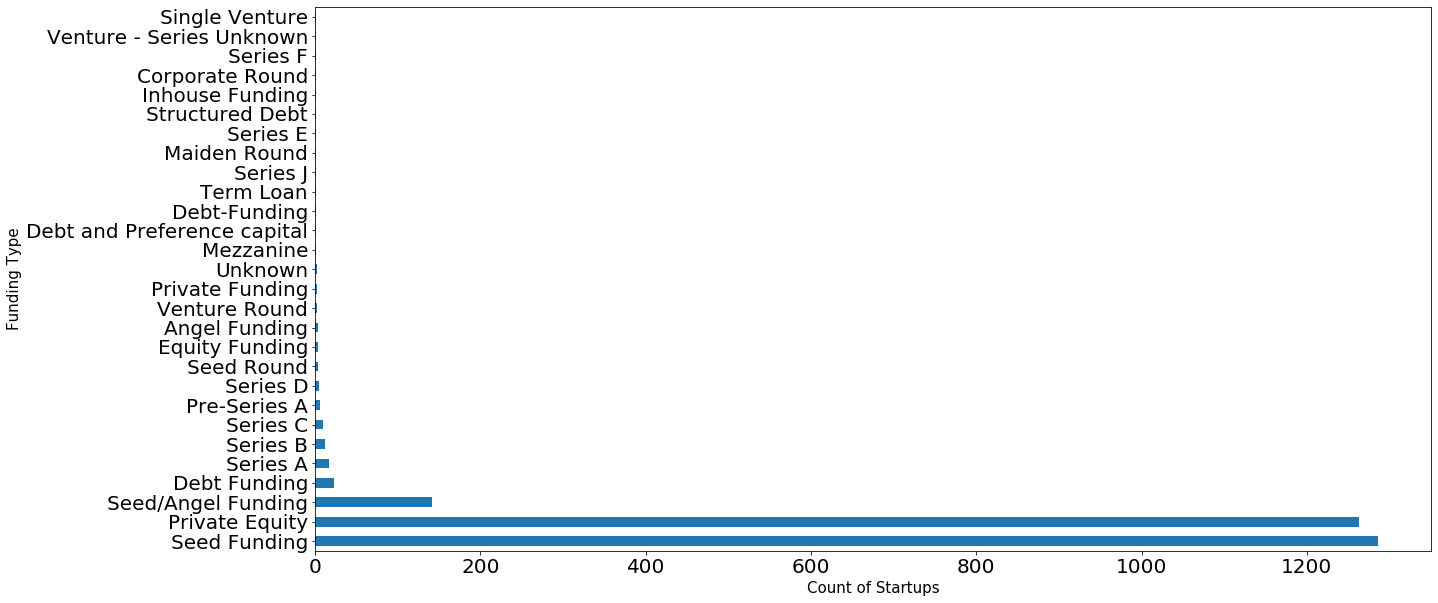

In [70]:
plt.figure(figsize=(20,10))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Count of Startups",fontsize=15)
plt.ylabel("Funding Type",fontsize=15)
startup_data.Investment_Type.value_counts().plot(kind='barh')

In [71]:
'''Percentage of Fundings for Each Category'''

startup_data.Investment_Type.value_counts()/len(startup_data.Investment_Type)

Seed Funding                   0.460767
Private Equity                 0.452526
Seed/Angel Funding             0.050520
Debt Funding                   0.008241
Series A                       0.006091
Series B                       0.004300
Series C                       0.003225
Pre-Series A                   0.002150
Series D                       0.001791
Seed Round                     0.001433
Equity Funding                 0.001075
Angel Funding                  0.001075
Venture Round                  0.000717
Private Funding                0.000717
Unknown                        0.000717
Mezzanine                      0.000358
Debt and Preference capital    0.000358
Debt-Funding                   0.000358
Term Loan                      0.000358
Series J                       0.000358
Maiden Round                   0.000358
Series E                       0.000358
Structured Debt                0.000358
Inhouse Funding                0.000358
Corporate Round                0.000358


<b>Inference:</b>The Major Type of Funding Is received by the Seed Funding followed by Private Equity Funding.Rest classes of funding are very infrequent

/home/dhruv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


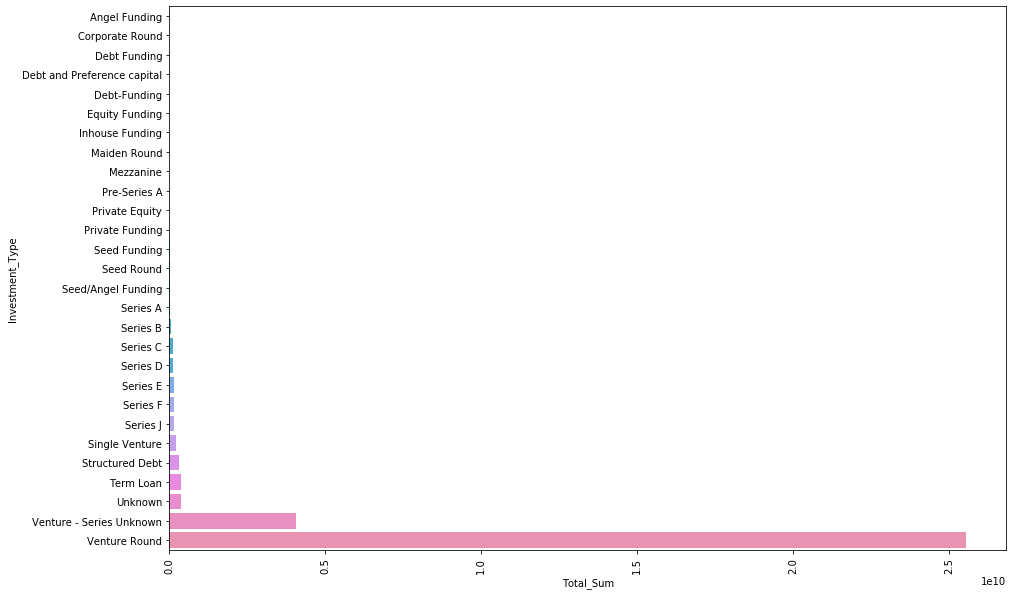

In [124]:
'''Sum of Funding Received By Type.The least amount of funding is given to Funding types other than the Series A-J,Venture Round Etc.Even though a lot of startus receive Seed funding,it\'s very less as sompared to Later Stage Money when the Clients are really Interested in Investing Money into a Particular Startup'''

new_data_funding_type=startup_data.groupby(startup_data.Investment_Type)['Amount_in_USD'].agg({'Total_Sum':'sum'})
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=new_data_funding_type.Total_Sum.sort_values(),y=new_data_funding_type.index,orient='h')

<b>Funding Received Based on Year</b>

In [84]:
new_data=startup_data.groupby(startup_data.Startup_Date.dt.year)['Amount_in_USD'].agg({'Total_Sum':'sum',"Total_Avg":'mean'})

/home/dhruv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


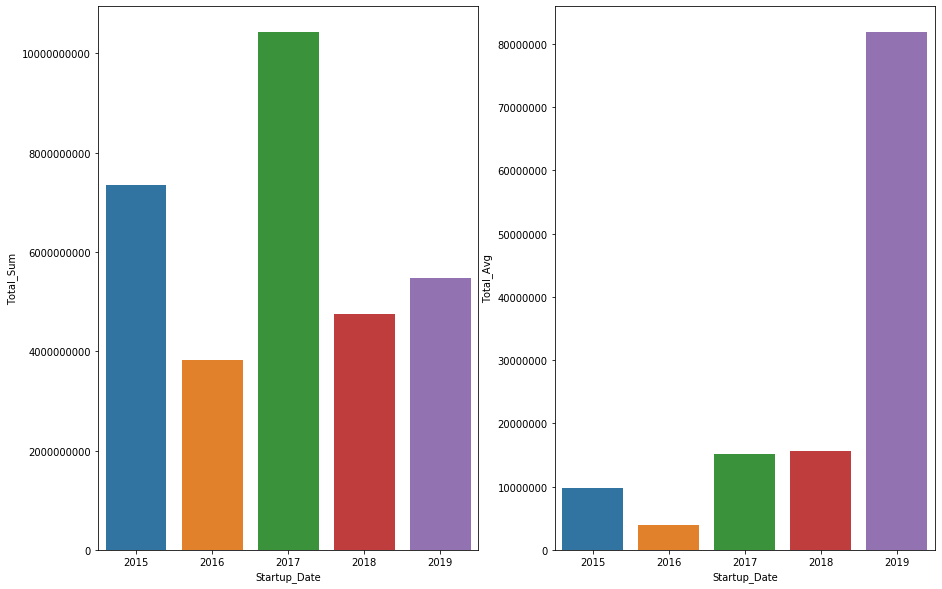

In [110]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y')
sns.barplot(x=new_data.index,y=new_data.Total_Sum,ax=ax[0])
sns.barplot(x=new_data.index,y=new_data.Total_Avg,ax=ax[1])

<b>Inference</b>:Even Though the Year 2016 had the Most Amount of Startups out of all the years,neither the amount of money invested(Total/Mean) is among the highest.Surprisingly,the Average Highest Funding is received in the year 2019.